# PI-IV

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
# algoritmos de distância
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [126]:
dataset = pd.read_csv('genres_v2.csv', low_memory=False)

In [137]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dancabilidade      42305 non-null  float64
 1   energia            42305 non-null  float64
 2   tune               42305 non-null  int64  
 3   sonoridade         42305 non-null  float64
 4   modo               42305 non-null  int64  
 5   fala_voz           42305 non-null  float64
 6   acustica           42305 non-null  float64
 7   instrumentalidade  42305 non-null  float64
 8   vivacidade         42305 non-null  float64
 9   valencia           42305 non-null  float64
 10  tempo              42305 non-null  float64
 11  tipo               42305 non-null  object 
 12  id                 42305 non-null  object 
 13  uri                42305 non-null  object 
 14  fonte_faixa        42305 non-null  object 
 15  url_analise        42305 non-null  object 
 16  duracao_ms         423

In [128]:
dataset.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


## 3º Pré- Processamento de Dados

In [129]:
dataset.drop(columns = (['Unnamed: 0', 'title']), inplace = True)

In [130]:
variaveis = ['song_name']

for i in variaveis:
    dataset[i].fillna('s/info', inplace = True)

In [131]:
a_renomear = {
    'danceability' : 'dancabilidade',
    'energy' : 'energia',
    'key': 'tune',
    'loudness': 'sonoridade',
    'mode': 'modo',
    'speechiness': 'fala_voz',
    'acousticness': 'acustica',
    'instrumentalness': 'instrumentalidade',
    'liveness': 'vivacidade',
    'valence': 'valencia',
    'type': 'tipo',
    'track_href': 'fonte_faixa',
    'analysis_url': 'url_analise',
    'duration_ms': 'duracao_ms',
    'time_signature': 'marcacao_tempo',
    'genre': 'genero',
    'song_name': 'nome_musica'
}
dataset = dataset.rename(columns = a_renomear)

In [132]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dancabilidade      42305 non-null  float64
 1   energia            42305 non-null  float64
 2   tune               42305 non-null  int64  
 3   sonoridade         42305 non-null  float64
 4   modo               42305 non-null  int64  
 5   fala_voz           42305 non-null  float64
 6   acustica           42305 non-null  float64
 7   instrumentalidade  42305 non-null  float64
 8   vivacidade         42305 non-null  float64
 9   valencia           42305 non-null  float64
 10  tempo              42305 non-null  float64
 11  tipo               42305 non-null  object 
 12  id                 42305 non-null  object 
 13  uri                42305 non-null  object 
 14  fonte_faixa        42305 non-null  object 
 15  url_analise        42305 non-null  object 
 16  duracao_ms         423

In [133]:
dataset.head()

,dancabilidade,energia,tune,sonoridade,modo,fala_voz,acustica,instrumentalidade,vivacidade,valencia,tempo,tipo,id,uri,fonte_faixa,url_analise,duracao_ms,marcacao_tempo,genero,nome_musica
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom


In [89]:
data = dataset[['dancabilidade', 'energia', 'tune', 'sonoridade', 'fala_voz', 'acustica', 'instrumentalidade', 'vivacidade', 'valencia', 'marcacao_tempo']]

In [90]:
#data = dataset[['dancabilidade', 'energia', 'fala_voz', 'acustica', 'instrumentalidade', 'valencia']]

In [91]:
data.head()

,dancabilidade,energia,tune,sonoridade,fala_voz,acustica,instrumentalidade,vivacidade,valencia,marcacao_tempo
0,0.831,0.814,2,-7.364,0.4200,0.0598,0.013400,0.0556,0.3890,4
1,0.719,0.493,8,-7.230,0.0794,0.4010,0.000000,0.1180,0.1240,4
2,0.850,0.893,5,-4.783,0.0623,0.0138,0.000004,0.3720,0.0391,4
3,0.476,0.781,0,-4.710,0.1030,0.0237,0.000000,0.1140,0.1750,3
4,0.798,0.624,2,-7.668,0.2930,0.2170,0.000000,0.1660,0.5910,4


In [92]:
# Obtém os valores dos atributos. Obtém os valores de cada variável num formato de array (x)
dataset_atrib = data.values

In [93]:
#imprime o array
dataset_atrib #variaveis de entrada(valores de 'x', não temos o 'y')

array([[0.831 , 0.814 , 2.    , ..., 0.0556, 0.389 , 4.    ],
       [0.719 , 0.493 , 8.    , ..., 0.118 , 0.124 , 4.    ],
       [0.85  , 0.893 , 5.    , ..., 0.372 , 0.0391, 4.    ],
       ...,
       [0.361 , 0.821 , 8.    , ..., 0.385 , 0.124 , 4.    ],
       [0.477 , 0.921 , 6.    , ..., 0.0575, 0.488 , 4.    ],
       [0.529 , 0.945 , 9.    , ..., 0.414 , 0.134 , 4.    ]])

In [94]:
#del treino
#del validacao

In [95]:
# Coleta uma amostra de 25% dos dados para treino
validacao, treino = train_test_split(dataset_atrib, train_size = 0.25)

In [96]:
treino.shape

(31729, 10)

In [97]:
validacao.shape

(10576, 10)

# 4º Máquina preditiva

## Usaremos o PCA para reduzir a quantidade de variáveis

In [98]:
# PCA = Principal component analysis
# aplica a redução de dimensionalidade no array das variáveis
pca = PCA(n_components = 2).fit_transform(data)

In [99]:
pca

array([[-3.3580045 ,  0.94361194],
       [ 2.63825219,  0.73451317],
       [-0.39854648, -1.68436493],
       ...,
       [ 2.57523714, -3.41301165],
       [ 0.60243853, -1.71049859],
       [ 3.61795149, -0.67590675]])

In [100]:
# utilizando o Kmeans - determinar um range do hiperparâmetro 'K' do Kmeans
k_range = range(1, 8)
k_range

range(1, 8)

In [101]:
# Aplicando o modelo K-means para cada valor de K (pode levar um certo tempo)
k_means_var = [KMeans(n_clusters = k).fit(pca) for k in k_range]

In [102]:
k_means_var

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7)]

## Curva de Elbow

In [103]:
# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

In [104]:
# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [105]:
# Soma dos quadrados das distâncias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

In [106]:
# Soma total dos quadrados
soma_total = sum(pdist(pca)**2)/pca.shape[0]

In [107]:
# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

Text(0.5, 1.0, 'Variância Explicada para cada Valor de K')

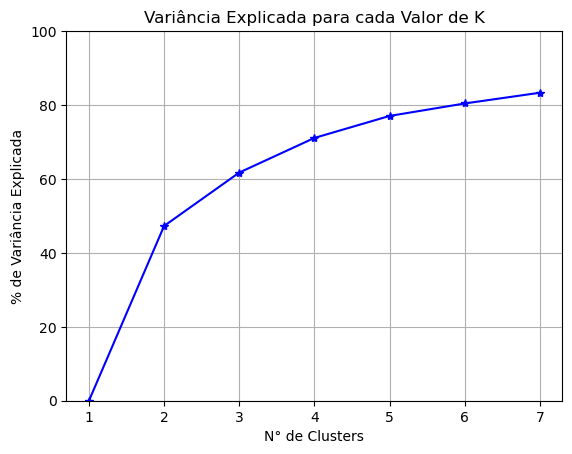

In [108]:
# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('N° de Clusters')
plt.ylabel('% de Variância Explicada')
plt.title('Variância Explicada para cada Valor de K')

In [109]:
del soma_total
del dataset
del soma_quadrados_intra_cluster

### Escolhendo um Valor de K inicial (igual a 7) para avaliação da Máquina Preditiva

In [110]:
# Criando um modelo com K = 7
modelo_v1 = KMeans(n_clusters = 7)
modelo_v1.fit(pca)

KMeans(n_clusters=7)

#### Avaliando a Máquina Preditiva V1 com k=7

In [111]:
# Obtém os valores mínimos e máximos e organiza o shape
x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() - 1
y_min, y_max = pca[:, 1].min() + 1, pca[:, 1].max() + 5

In [112]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

In [113]:
Z = modelo_v1.predict(np.c_[xx.ravel(), yy.ravel()])

In [114]:
Z = Z.reshape(xx.shape)

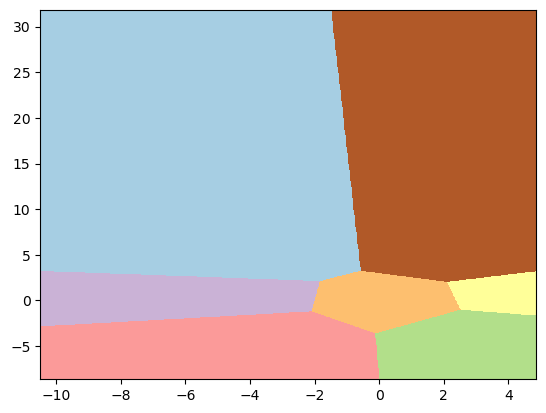

In [115]:
# Plot das áreas dos clusters
plt.figure(1)
plt.clf()
plt.imshow(Z, 
           interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Paired,
           aspect = 'auto', 
           origin = 'lower')

In [116]:
# Silhouette Score
labels = modelo_v1.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.3633176128493704

### Escolhendo um Valor de K inicial (igual a 8) para avaliação da Máquina Preditiva

In [117]:
# Criando um modelo com K = 8
modelo_v2 = KMeans(n_clusters = 8)
modelo_v2.fit(pca)

KMeans()

In [118]:
# Silhouette Score
labels = modelo_v2.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.368040930693335

### Escolhendo um Valor de K inicial (igual a 6) para avaliação da Máquina Preditiva

In [123]:
# Criando um modelo com K = 6
modelo_v3 = KMeans(n_clusters = 6)
modelo_v3.fit(pca)

KMeans(n_clusters=6)

In [124]:
# Silhouette Score
labels = modelo_v3.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.37522715128795386

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dancabilidade      42305 non-null  float64
 1   energia            42305 non-null  float64
 2   tune               42305 non-null  int64  
 3   sonoridade         42305 non-null  float64
 4   fala_voz           42305 non-null  float64
 5   acustica           42305 non-null  float64
 6   instrumentalidade  42305 non-null  float64
 7   vivacidade         42305 non-null  float64
 8   valencia           42305 non-null  float64
 9   marcacao_tempo     42305 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 3.2 MB


In [139]:
# Incluindo o n° do cluster na base de clientes
data['tune'] = pd.to_numeric(data['tune'])

In [138]:
cluster_map = pd.DataFrame(data, columns = data)
cluster_map['tune'] = pd.to_numeric(cluster_map['tune'])
cluster_map['marcacao_tempo'] = pd.to_numeric(cluster_map['marcacao_tempo'])

ValueError: Index data must be 1-dimensional

In [135]:
cluster_map['cluster'] = modelo_v3.labels_

ValueError: Index data must be 1-dimensional